<a href="https://colab.research.google.com/github/aashutoshdubey0/Medical-Insurance-Premium-Prediction-with-Machine-Learning/blob/main/Medical_Insurance_Premium_Prediction_with_Machine_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing Libraries and Datasets

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving insurance.csv to insurance.csv


In [ ]:
insurance_df=pd.read_csv('insurance.csv')

In [ ]:
insurance_df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


Exploratory Data Analysis

In [ ]:
insurance_df.isnull()

,age,sex,bmi,children,smoker,region,charges
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
1333,False,False,False,False,False,False,False
1334,False,False,False,False,False,False,False
1335,False,False,False,False,False,False,False
1336,False,False,False,False,False,False,False


In [ ]:
insurance_df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [ ]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
insurance_df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df_region=insurance_df.groupby(by='region').mean()
df_region

,age,bmi,children,charges
region,,,,
northeast,39.268519,29.173503,1.046296,13406.384516
northwest,39.196923,29.199785,1.147692,12417.575374
southeast,38.939560,33.355989,1.049451,14735.411438
southwest,39.455385,30.596615,1.141538,12346.937377


Group data by age and examine the relationship between age and charges

In [ ]:
df_age=insurance_df.groupby(by='age').mean()
df_age

,bmi,children,charges
age,,,
18,31.326159,0.449275,7086.217556
19,28.596912,0.426471,9747.909335
20,30.632759,0.862069,10159.697736
21,28.185714,0.785714,4730.464330
22,31.087679,0.714286,10012.932802
23,31.454464,1.000000,12419.820040
24,29.142679,0.464286,10648.015962
25,29.693929,1.285714,9838.365311
26,29.428929,1.071429,6133.825309


Feature Engineering/ Cleaning of Data/ Pre Processing

In [ ]:
insurance_df['sex'].unique()

array(['female', 'male'], dtype=object)

In [ ]:
insurance_df['sex']=insurance_df['sex'].apply(lambda x:0    if x=='female' else 1)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,yes,southwest,16884.92400
1,18,1,33.770,1,no,southeast,1725.55230
2,28,1,33.000,3,no,southeast,4449.46200
3,33,1,22.705,0,no,northwest,21984.47061
4,32,1,28.880,0,no,northwest,3866.85520


In [ ]:
insurance_df['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [ ]:
insurance_df['smoker']=insurance_df['smoker'].apply(lambda x:0    if x=='no' else 1)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,southwest,16884.92400
1,18,1,33.770,1,0,southeast,1725.55230
2,28,1,33.000,3,0,southeast,4449.46200
3,33,1,22.705,0,0,northwest,21984.47061
4,32,1,28.880,0,0,northwest,3866.85520


In [ ]:
insurance_df['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [ ]:
region_dummies=pd.get_dummies(insurance_df['region'],drop_first=True)

In [ ]:
region_dummies

,northwest,southeast,southwest
0,0,0,1
1,0,1,0
2,0,1,0
3,1,0,0
4,1,0,0
...,...,...,...
1333,1,0,0
1334,0,0,0
1335,0,1,0
1336,0,0,1


In [ ]:
insurance_df=pd.concat([insurance_df, region_dummies], axis=1)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,southwest,16884.92400,0,0,1
1,18,1,33.770,1,0,southeast,1725.55230,0,1,0
2,28,1,33.000,3,0,southeast,4449.46200,0,1,0
3,33,1,22.705,0,0,northwest,21984.47061,1,0,0
4,32,1,28.880,0,0,northwest,3866.85520,1,0,0


In [ ]:
insurance_df.drop(['region'],axis=1, inplace=True)

In [ ]:
insurance_df.head()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
0,19,0,27.900,0,1,16884.92400,0,0,1
1,18,1,33.770,1,0,1725.55230,0,1,0
2,28,1,33.000,3,0,4449.46200,0,1,0
3,33,1,22.705,0,0,21984.47061,1,0,0
4,32,1,28.880,0,0,3866.85520,1,0,0


Data Visualization

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f296e18bb10>,
      dtype=object)

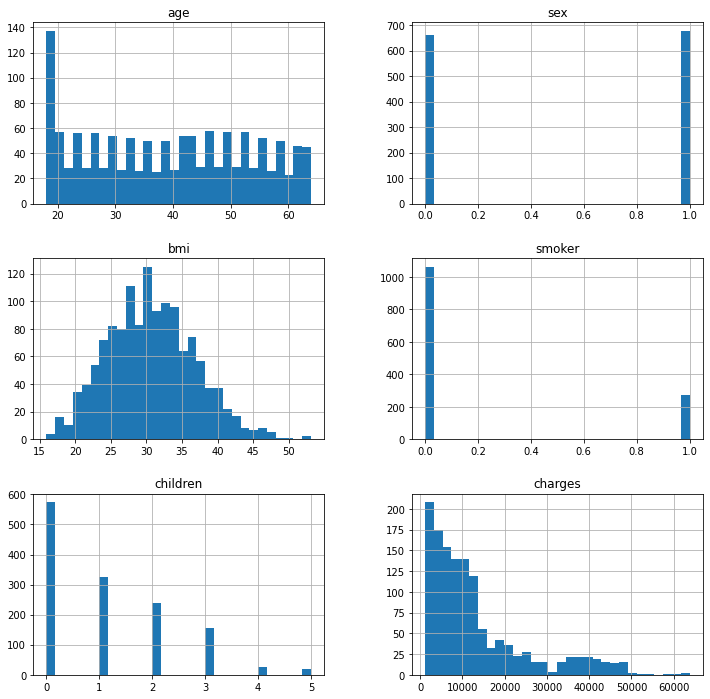

In [ ]:
insurance_df[['age','sex','bmi','smoker','children','charges']].hist(bins=30,figsize=(12,12))

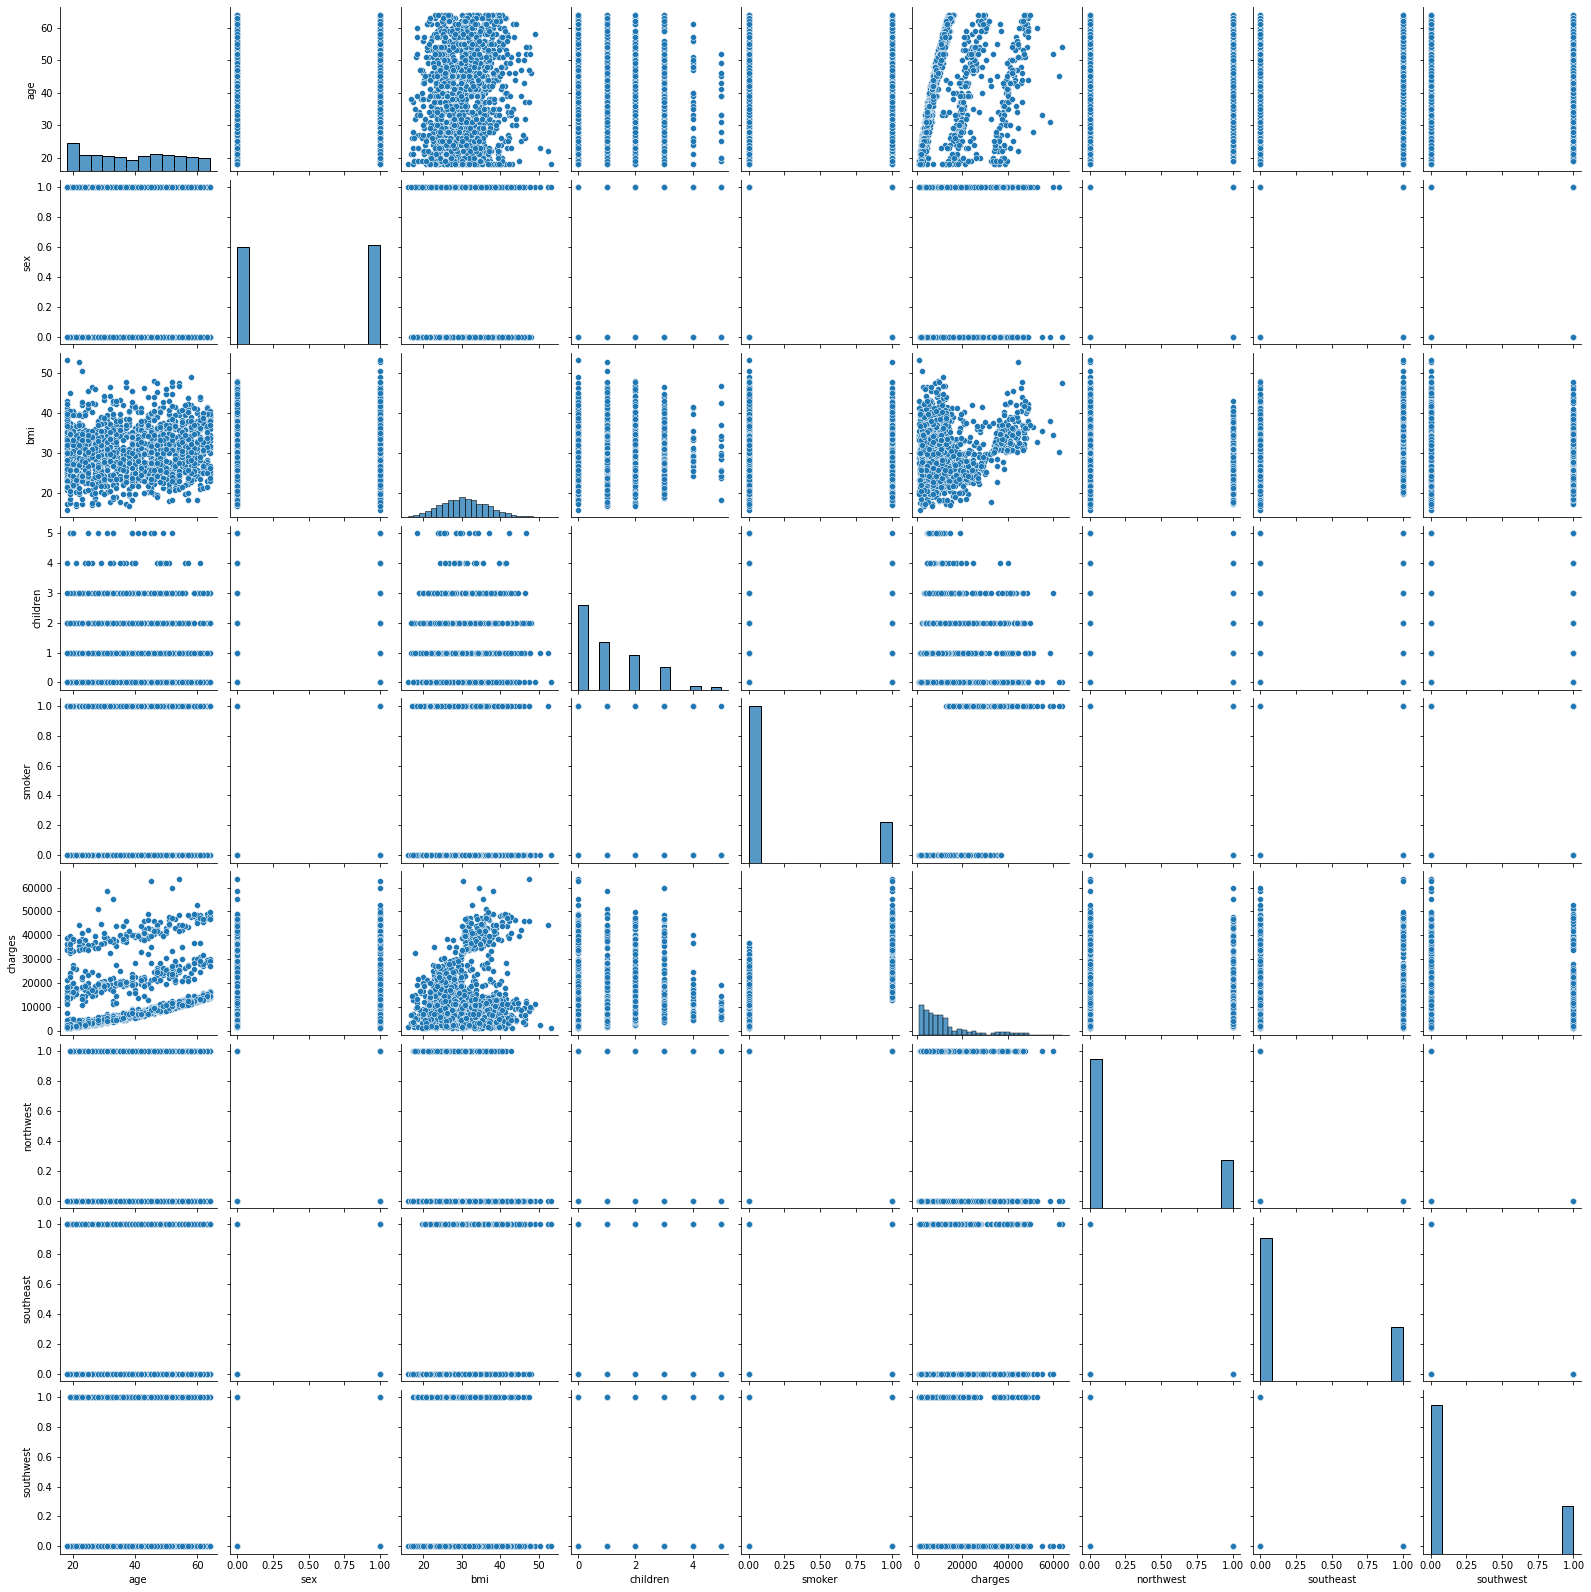

In [ ]:
sns.pairplot(insurance_df)

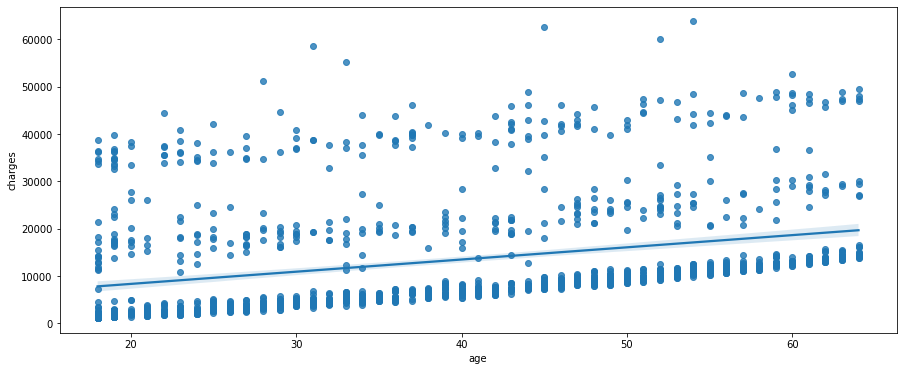

In [ ]:
#draw regression plot, i.e. st line that goes through data using age and charges
plt.figure(figsize=(15,6))
sns.regplot(x='age',y='charges',data=insurance_df)
plt.show()

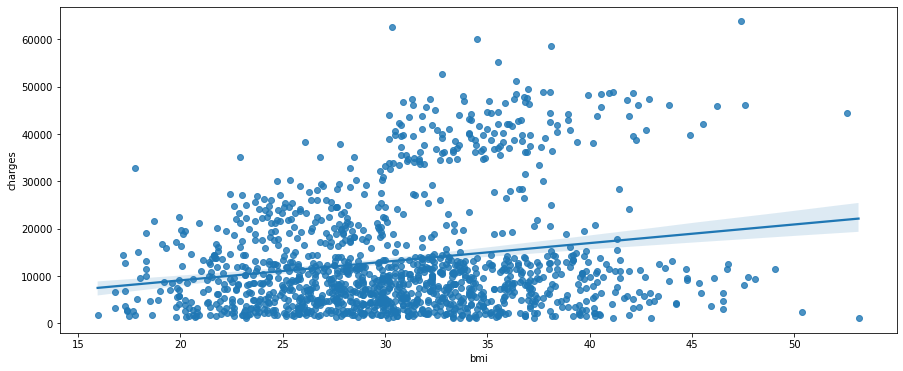

In [ ]:
#draw regression plot, i.e. st line that goes through data using bmi and charges
plt.figure(figsize=(15,6))
sns.regplot(x='bmi',y='charges',data=insurance_df)
plt.show()

In [ ]:
insurance_df.corr()

,age,sex,bmi,children,smoker,charges,northwest,southeast,southwest
age,1.000000,-0.020856,0.109272,0.042469,-0.025019,0.299008,-0.000407,-0.011642,0.010016
sex,-0.020856,1.000000,0.046371,0.017163,0.076185,0.057292,-0.011156,0.017117,-0.004184
bmi,0.109272,0.046371,1.000000,0.012759,0.003750,0.198341,-0.135996,0.270025,-0.006205
children,0.042469,0.017163,0.012759,1.000000,0.007673,0.067998,0.024806,-0.023066,0.021914
smoker,-0.025019,0.076185,0.003750,0.007673,1.000000,0.787251,-0.036945,0.068498,-0.036945
charges,0.299008,0.057292,0.198341,0.067998,0.787251,1.000000,-0.039905,0.073982,-0.043210
northwest,-0.000407,-0.011156,-0.135996,0.024806,-0.036945,-0.039905,1.000000,-0.346265,-0.320829
southeast,-0.011642,0.017117,0.270025,-0.023066,0.068498,0.073982,-0.346265,1.000000,-0.346265
southwest,0.010016,-0.004184,-0.006205,0.021914,-0.036945,-0.043210,-0.320829,-0.346265,1.000000


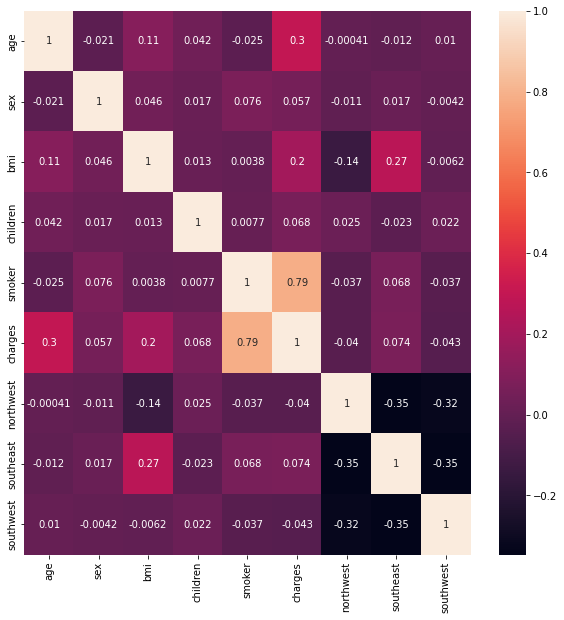

In [ ]:
#finding feature with most poscorrelation with charges
plt.figure(figsize=(10,10))
sns.heatmap(insurance_df.corr(),annot=True)

Create Training and Testing Dataset

In [ ]:
insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [ ]:
#dividing data into inputs and outputs
#X=inputs
#y=outputs

insurance_df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'],
      dtype='object')

In [ ]:
X=insurance_df.drop(columns = ['charges'] )
y=insurance_df['charges']

In [ ]:
X

,age,sex,bmi,children,smoker,northwest,southeast,southwest
0,19,0,27.900,0,1,0,0,1
1,18,1,33.770,1,0,0,1,0
2,28,1,33.000,3,0,0,1,0
3,33,1,22.705,0,0,1,0,0
4,32,1,28.880,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,0,0
1334,18,0,31.920,0,0,0,0,0
1335,18,0,36.850,0,0,0,1,0
1336,21,0,25.800,0,0,0,0,1


In [ ]:
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [ ]:
X.shape

(1338, 8)

In [ ]:
y.shape

(1338,)

In [ ]:
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
y=y.reshape(-1,1)

In [ ]:
X

array([[19.  ,  0.  , 27.9 , ...,  0.  ,  0.  ,  1.  ],
       [18.  ,  1.  , 33.77, ...,  0.  ,  1.  ,  0.  ],
       [28.  ,  1.  , 33.  , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [18.  ,  0.  , 36.85, ...,  0.  ,  1.  ,  0.  ],
       [21.  ,  0.  , 25.8 , ...,  0.  ,  0.  ,  1.  ],
       [61.  ,  0.  , 29.07, ...,  1.  ,  0.  ,  0.  ]], dtype=float32)

In [ ]:
y.shape

(1338, 1)

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

scaler_x=StandardScaler()
X=scaler_x.fit_transform(X)

scaler_y=StandardScaler()
y=scaler_y.fit_transform(y)

Splitting Data into 20% Testing and 80% Training

Double check that the split was suxccesful by getting shape of both the training and testing datasets

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test, y_train, y_test=train_test_split(X,y,test_size=0.2,random_state=10)

print(X_train.shape)
print(X_test.shape)

(1070, 8)
(268, 8)


Train and Evaluate a Linear Regression Model in SCIKIT-LEARN

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score

regression_model_sklearn=LinearRegression()
regression_model_sklearn.fit(X_train, y_train)

LinearRegression()

In [ ]:
regression_model_sklearn_accuracy=regression_model_sklearn.score(X_test, y_test)

In [ ]:
regression_model_sklearn_accuracy

0.6953286617446484

Therefore as visbile, the accuracy of the model is 69%

In [ ]:
y_predict = regression_model_sklearn.predict(X_test)

In [ ]:
y_predict

array([[-0.42572552],
       [-0.6067396 ],
       [ 0.17294656],
       [-0.18153396],
       [-0.7817577 ],
       [-0.30027035],
       [-0.3436543 ],
       [ 1.0284383 ],
       [-0.4883426 ],
       [ 1.4423101 ],
       [-0.95102996],
       [-0.749873  ],
       [-0.4867451 ],
       [-0.16618274],
       [-0.02551321],
       [-0.17528403],
       [-0.648665  ],
       [ 0.42720905],
       [-0.20395783],
       [ 1.4590567 ],
       [ 1.7275491 ],
       [-0.7301916 ],
       [-0.99343055],
       [-0.49203613],
       [-0.7576067 ],
       [ 0.01660629],
       [-0.10378103],
       [-0.2440924 ],
       [-0.5532687 ],
       [ 1.480323  ],
       [-1.2340801 ],
       [ 1.7293469 ],
       [-0.32889464],
       [-0.48913717],
       [-0.4395589 ],
       [-0.11670221],
       [ 0.02112538],
       [-0.03368173],
       [-0.2768595 ],
       [-0.38666663],
       [ 0.20460097],
       [-0.2821571 ],
       [-0.63721544],
       [-0.13953155],
       [-0.6561241 ],
       [-0

In [ ]:
#take y and perform inverse transform

#we scale data first s obtain the transform for it

#we wanna go back and perform inverse transform

#Reason: Generate charges in original units

#after training model and after generating predictions to print out/plot different matrices

#rmse, mse, abs error,etc.

y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig=scaler_y.inverse_transform(y_test)

In [ ]:
k=X_test.shape
n= len(X_test)
n

268

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE=mean_squared_error(y_test_orig,y_predict_orig)

In [ ]:
MAE= mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)


In [ ]:
print('RMSE=', RMSE,'\nMSE=',MSE,'\nMAE=',MAE,'\nR2=',r2)

RMSE= 6536.847 
MSE= 42730370.0 
MAE= 4555.099 
R2= 0.6953286762768424


In [ ]:
#tensorflow is google's framework to train model and deploy AI and ML models
#keras is an API that makes code simpler 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

In [ ]:
ANN_model=keras.Sequential()
#build model in sequential fashion

In [ ]:
ANN_model.add(Dense(50, input_dim=8))
#add layers to ANN. First layer is Dense layer with 50 nuerons and input dim=8; Notice that X = input dim

In [ ]:
ANN_model.add(Activation('relu'))
#rectify linear units
#add or reduce non linearity in networks

In [ ]:
ANN_model.add(Dense(150))

In [ ]:
ANN_model.add(Activation('relu'))

In [ ]:
ANN_model.add(Dense(150))

In [ ]:
ANN_model.add(Activation('relu'))

In [ ]:
ANN_model.add(Dense(50))

In [ ]:
ANN_model.add(Activation('linear'))

In [ ]:
ANN_model.add(Dense(1))

In [ ]:
ANN_model.compile(loss='mse',optimizer='adam')

In [ ]:
ANN_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 50)                450       
                                                                 
 activation (Activation)     (None, 50)                0         
                                                                 
 dense_1 (Dense)             (None, 150)               7650      
                                                                 
 activation_1 (Activation)   (None, 150)               0         
                                                                 
 dense_2 (Dense)             (None, 150)               22650     
                                                                 
 activation_2 (Activation)   (None, 150)               0         
                                                                 
 dense_3 (Dense)             (None, 50)               

In [ ]:
ANN_model.compile(optimizer='adam', loss='mean_squared_error')

In [ ]:
epochs_hist = ANN_model.fit(X_train, y_train, epochs=100, batch_size=20, validation_split=0.2)

Epoch 1/100
43/43 [==============================] - 2s 22ms/step - loss: 0.3622 - val_loss: 0.2036
Epoch 2/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1691 - val_loss: 0.1911
Epoch 3/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1442 - val_loss: 0.1973
Epoch 4/100
43/43 [==============================] - 0s 8ms/step - loss: 0.1366 - val_loss: 0.1870
Epoch 5/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1249 - val_loss: 0.1749
Epoch 6/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1235 - val_loss: 0.1725
Epoch 7/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1289 - val_loss: 0.1923
Epoch 8/100
43/43 [==============================] - 0s 5ms/step - loss: 0.1184 - val_loss: 0.1934
Epoch 9/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1149 - val_loss: 0.1993
Epoch 10/100
43/43 [==============================] - 0s 4ms/step - loss: 0.1111 - val_loss: 0.1795
Epoch 11

In [ ]:
result = ANN_model.evaluate(X_test, y_test)
accuracy_ANN = 1 - result
print("Accuracy :{}".format(accuracy_ANN))

9/9 [==============================] - 0s 4ms/step - loss: 0.2671
Accuracy :0.7328847050666809


In [ ]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

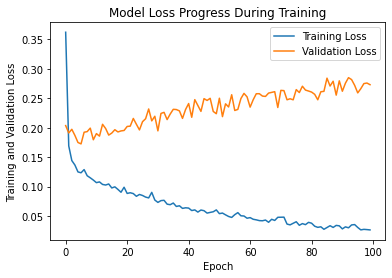

In [ ]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Model Loss Progress During Training')
plt.xlabel('Epoch')
plt.ylabel('Training and Validation Loss')
plt.legend(['Training Loss','Validation Loss'])

In [ ]:
y_predict= ANN_model.predict(X_test)

9/9 [==============================] - 0s 2ms/step


Text(0, 0.5, 'True Values')

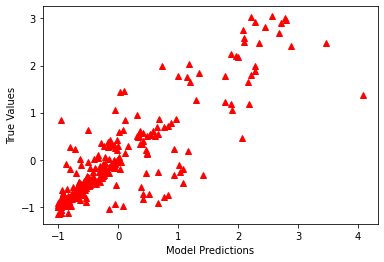

In [ ]:
plt.plot(y_test,y_predict,"^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
y_predict_orig=scaler_y.inverse_transform(y_predict)
y_test_orig = scaler_y.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

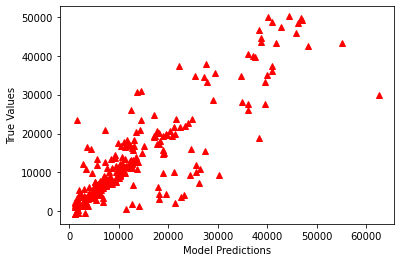

In [ ]:
plt.plot(y_test_orig, y_predict_orig, "^", color='r')
plt.xlabel('Model Predictions')
plt.ylabel('True Values')

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error,mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)),'.3f'))
MSE=mean_squared_error(y_test_orig,y_predict_orig)
MAE= mean_absolute_error(y_test_orig,y_predict_orig)
r2=r2_score(y_test_orig,y_predict_orig)
print('RMSE=', RMSE,'\nMSE=',MSE,'\nMAE=',MAE,'\nR2=',r2)

RMSE= 6256.501 
MSE= 39143812.0 
MAE= 3705.6917 
R2= 0.7209010962569651


Using Dropout to regularize and improve network genralization ability

In [ ]:
#in networks codependancies start to form therefore randomly drop couple of layers
#ANN_model.add(Dropout(0.5)) in formation of ANN